# Relative permeability UserObjects #

Tests used for the relative permeability UserObjects

Chris Green, 2015 (chris.green@csiro.au)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Perfectly mobile ##

The *RelativePermeabilityPerfectlyMobile* UserObject returns one for all phases at all saturations, i.e., $k_{rl} = k_{rg} = 1$.

In [141]:
cols = ('krg', 'krl', 'id', 'x', 'y', 'z')
pm = pd.read_csv('gold/RelativePermeabilityPerfectlyMobile_vpp_0001.csv', header = 0, names = cols)

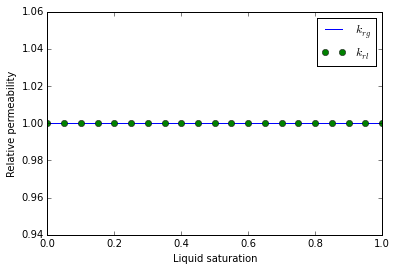

In [148]:
plt.plot(pm.x, pm.krg, label='$k_{rg}$')
plt.plot(pm.x, pm.krl,'o', label = '$k_{rl}$')
plt.xlabel('Liquid saturation')
plt.ylabel('Relative permeability')
plt.legend(loc='upper right')

## van Genuchten ##

The *RelativePermeabilityVanGenuchten* UserObject implements the liquid relative permeability functions of van Genuchten, taken from *van Genuchten, M. Th., A closed for equation for predicting the hydraulic conductivity of unsaturated soils, Soil Sci. Soc., 44, 892-898 (1980)*. 

The gas relative permeability function is due to Corey, *Corey, A. T., The interrelation between gas and oil        relative permeabilities, Prod. Month. 38-41 (1954)*.

The effective saturation is defined as 
\begin{equation}
S^* = (S_l - S_{lr}) / (S_{ls} - S_{lr})
\end{equation}
where $S_l$ is the liquid saturation, $S_{lr}$ is the residual (or irreducable) liquid saturation, and $S_{ls}$ is the fully saturated liquid saturation.

The liquid phase relative permeability $k_{rl}$ is given by
\begin{equation}
k_{rl} = \left\{ \begin{array}{ll}
\sqrt{S^*} \left(1 - \left(1 - \left(S^*\right)^{1/\lambda} \right)^{\lambda} \right)^2, & S_{l} < S_{ls} \\
1, & S_{l} \ge S_{ls}
\end{array} \right.
\end{equation}

The gas phase relative permeability $k_{rg}$ is given by
\begin{equation}
k_{rg} = \left\{ \begin{array}{ll}
1 - k_{rl}, & S_{gr} = 0 \\
(1- \hat{S})^2 (1- \hat{S}^2), & S_{gr} > 0 \\
\end{array} \right.
\end{equation}
where 
\begin{equation}
\hat{S} = (S_l - S_{lr}) / (1 - S_{lr} - S_{gr}).
\end{equation}

Note that the relative permeabilities are restricted to the domain [0,1].



Defining a function to calculate the van Genuchten form of the relative permeabilities.

In [3]:
def relpermvg(Sl, Slr, Sls, Sgr, m) :
    
    # Calculate effective saturation
    S_star = (Sl - Slr)/(Sls - Slr)
    S_hat = (Sl - Slr)/(1 - Slr - Sgr)
    
    # The liquid relative permeability is 
    krl = np.sqrt(S_star) * (1 - np.power(1 - np.power(S_star, 1.0/m), m))**2
    
    # The gas relative permeability is
    if (Sgr == 0 ) : 
        krg = 1.0 - krl
    else :
        krg = (1 - S_hat)**2 * (1 - S_hat**2)
    
    # Restrict krl and krg to be between 0 and 1
    return np.clip(krl,0,1), np.clip(krg,0,1)


In [4]:
xdata = np.linspace(0,1)
krl1, krg1 = relpermvg(xdata, 0, 1, 0, 0.5)
krl2, krg2 = relpermvg(xdata, 0, 1, 0.2, 0.5)
krl3, krg3 = relpermvg(xdata, 0, 1, 0.2, 0.9)
krl4, krg4 = relpermvg(xdata, 0.1, 1, 0.2, 0.5)

Read in the data from the MOOSE tests for the van Genuchten relative permeability.

In [13]:
cols = ('krg', 'krl', 'id', 'x', 'y', 'z')
cols2 = ('krg', 'krl', 'dkrg', 'dkrl', 'id', 'x', 'y', 'z')

vg1 = pd.read_csv('../../../../tests/userobjects/RelativePermeability/gold/RelativePermeabilityVanGenuchten1_vpp_0001.csv', header = 0, names = cols2)
vg2 = pd.read_csv('gold/RelativePermeabilityVanGenuchten2_vpp_0001.csv', header = 0, names = cols)
vg3 = pd.read_csv('gold/RelativePermeabilityVanGenuchten3_vpp_0001.csv', header = 0, names = cols)
vg4 = pd.read_csv('gold/RelativePermeabilityVanGenuchten4_vpp_0001.csv', header = 0, names = cols)

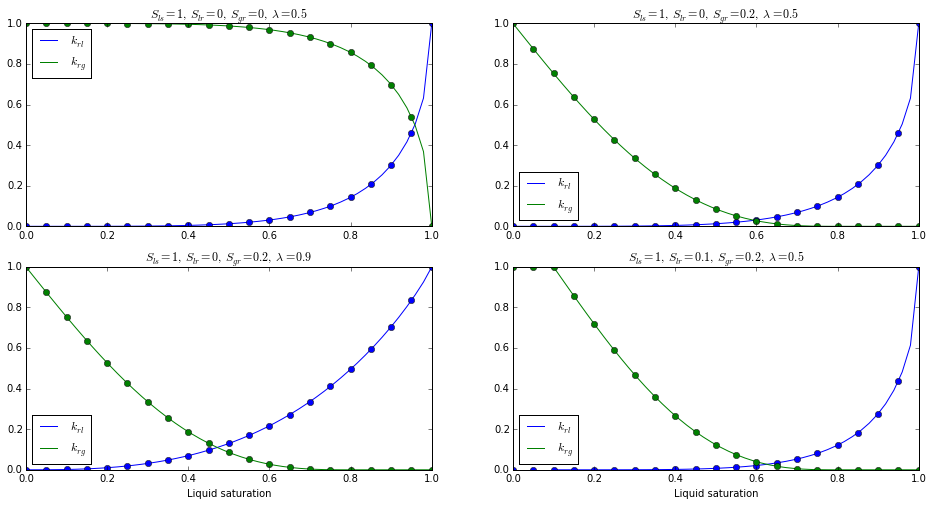

In [14]:
fig, axes = plt.subplots(2,2, figsize = (16,8))
# Case 1
axes[0,0].plot(xdata, krl1, label = '$k_{rl}$')
axes[0,0].plot(xdata, krg1, label = '$k_{rg}$')
axes[0,0].plot(vg1.x, vg1.krl, 'ob')
axes[0,0].plot(vg1.x, vg1.krg, 'og')
axes[0,0].legend(loc = 'best')
axes[0,0].set_title('$S_{ls}=1, \,S_{lr}=0, \,S_{gr}=0, \,\lambda = 0.5$')
# Case 2
axes[0,1].plot(xdata, krl2, label = '$k_{rl}$')
axes[0,1].plot(xdata, krg2, label = '$k_{rg}$')
axes[0,1].plot(vg2.x, vg2.krl, 'ob')
axes[0,1].plot(vg2.x, vg2.krg, 'og')
axes[0,1].legend(loc = 'best')
axes[0,1].set_title('$S_{ls}=1, \,S_{lr}=0, \,S_{gr}=0.2, \,\lambda = 0.5$')
# Case 3
axes[1,0].plot(xdata, krl3, label = '$k_{rl}$')
axes[1,0].plot(xdata, krg3, label = '$k_{rg}$')
axes[1,0].plot(vg3.x, vg3.krl, 'ob')
axes[1,0].plot(vg3.x, vg3.krg, 'og')
axes[1,0].legend(loc = 'best')
axes[1,0].set_xlabel('Liquid saturation')
axes[1,0].set_title('$S_{ls}=1, \,S_{lr}=0, \,S_{gr}=0.2, \,\lambda = 0.9$')
# Case 4
axes[1,1].plot(xdata, krl4, label = '$k_{rl}$')
axes[1,1].plot(xdata, krg4, label = '$k_{rg}$')
axes[1,1].plot(vg4.x, vg4.krl, 'ob')
axes[1,1].plot(vg4.x, vg4.krg, 'og')
axes[1,1].legend(loc = 'best')
axes[1,1].set_xlabel('Liquid saturation')
axes[1,1].set_title('$S_{ls}=1, \,S_{lr}=0.1, \,S_{gr}=0.2, \,\lambda = 0.5$')

Check the derivative of the relative permeability as well.

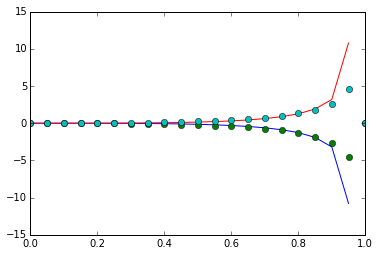

In [39]:
dx = vg1.x[1] - vg1.x[0]
plt.plot(vg1.x[0:len(vg1)-1], np.diff(vg1.krg)/dx)
plt.plot(vg1.x, vg1.dkrg,'o')
plt.plot(vg1.x[0:len(vg1)-1], np.diff(vg1.krl)/dx)
plt.plot(vg1.x, vg1.dkrl,'o')

## Corey ##

The *RelativePermeabilityCorey* UserObject implements the relative permeability functions of Corey, taken from  *Corey, A. T., The interrelation between gas and oil relative permeabilities, Prod. Month. 38-41 (1954)*.

The effective saturation is defined as 
\begin{equation}
\hat{S} = (S_l - S_{lr}) / (1 - S_{lr} - S_{gr}).
\end{equation}
where $S_l$ is the liquid saturation, $S_{lr}$ is the residual (or irreducable) liquid saturation, and $S_{gr}$ is the residual gas saturation.

The liquid phase relative permeability $k_{rl}$ is given by
\begin{equation}
k_{rl} = \hat{S_l^4}
\end{equation}

The gas phase relative permeability $k_{rg}$ is given by
\begin{equation}
k_{rg} = 
(1- \hat{S})^2 (1- \hat{S}^2)
\end{equation}

Note that the relative permeabilities are restricted to the domain [0,1].



In [153]:
def relpermc(Sl, Slr, Sgr) :
    
    # Calculate effective saturation
    S_hat = (Sl - Slr)/(1 - Slr - Sgr)
    
    # The liquid relative permeability is 
    krl =  np.power(S_hat, 4.0)
    
    # The gas relative permeability is
    krg = (1 - S_hat)**2 * (1 - S_hat**2)
    
    # Restrict krl and krg to be between 0 and 1
    return np.clip(krl,0,1), np.clip(krg,0,1)


In [163]:
xdata = np.linspace(0,1)
krl1, krg1 = relpermc(xdata, 0, 0)
krl2, krg2 = relpermc(xdata, 0.1, 0.2)

Read in the data from the MOOSE tests for the Corey relative permeability.

In [156]:
cols = ('krg', 'krl', 'id', 'x', 'y', 'z')
c1 = pd.read_csv('gold/RelativePermeabilityCorey1_vpp_0001.csv', header = 0, names = cols)
c2 = pd.read_csv('gold/RelativePermeabilityCorey2_vpp_0001.csv', header = 0, names = cols)

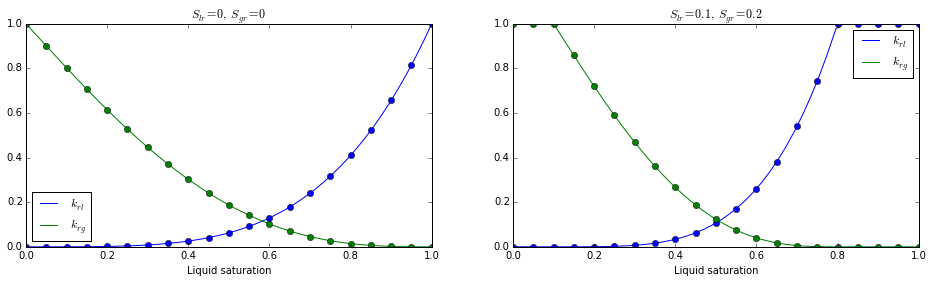

In [169]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
# Case 1
axes[0].plot(xdata, krl1, label = '$k_{rl}$')
axes[0].plot(xdata, krg1, label = '$k_{rg}$')
axes[0].plot(c1.x, c1.krl, 'ob')
axes[0].plot(c1.x, c1.krg, 'og')
axes[0].legend(loc = 'best')
axes[0].set_title('$S_{lr}=0, \,S_{gr}=0$')
axes[0].set_xlabel('Liquid saturation')
# Case 2
axes[1].plot(xdata, krl2, label = '$k_{rl}$')
axes[1].plot(xdata, krg2, label = '$k_{rg}$')
axes[1].plot(c2.x, c2.krl, 'ob')
axes[1].plot(c2.x, c2.krg, 'og')
axes[1].legend(loc = 'best')
axes[1].set_title('$S_{lr}=0.1, \,S_{gr}=0.2$')
axes[1].set_xlabel('Liquid saturation')